In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 02:51:14,185] A new study created in memory with name: no-name-174d6a1b-79a5-4938-a5d0-0d97564adf70
[I 2025-04-27 02:51:14,348] Trial 0 finished with value: 0.966856925418569 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 15, 'p': 1}. Best is trial 0 with value: 0.966856925418569.
[I 2025-04-27 02:51:14,611] Trial 1 finished with value: 0.9584855403348553 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 22, 'p': 2}. Best is trial 0 with value: 0.966856925418569.
[I 2025-04-27 02:51:14,704] Trial 2 finished with value: 0.9695205479452055 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 40, 'p': 2}. Best is trial 2 with value: 0.9695205479452055.
[I 2025-04-27 02:51:14,795] Trial 3 finished with value: 0.9668569254185693 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 33, 'p': 1}. Best is trial 2

Best trial:
Accuracy: 0.975076103500761
Best hyperparameters:  {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 1}


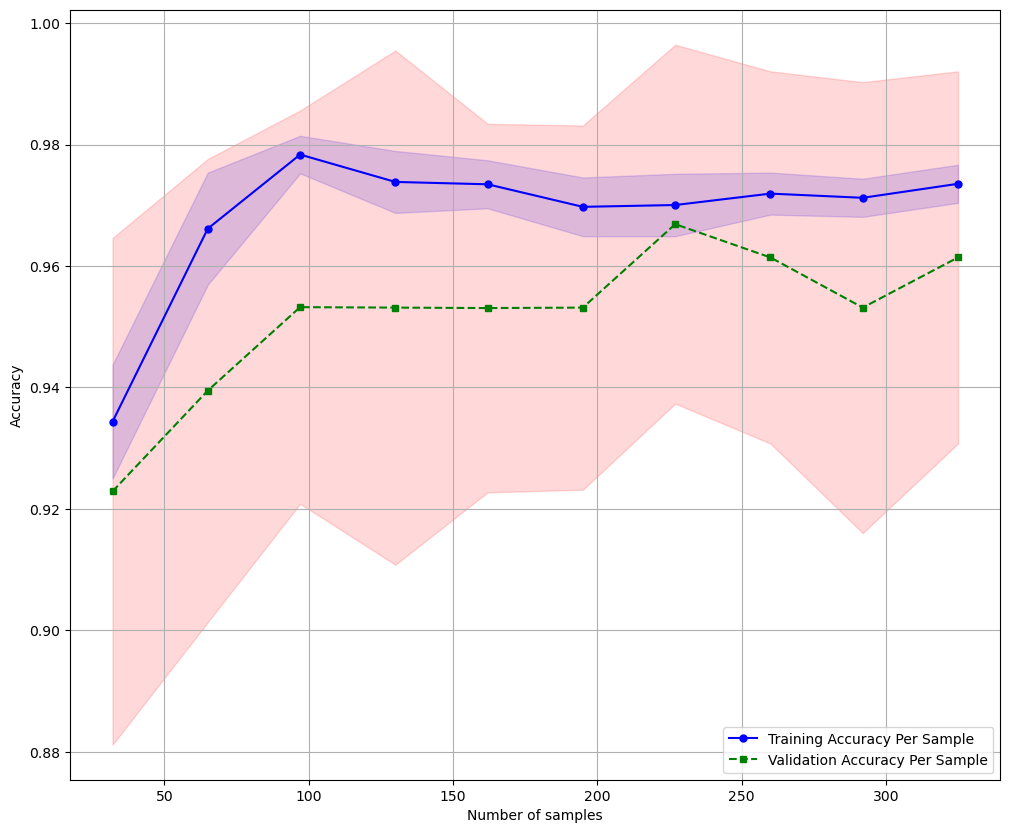

Confusion Matrix
[[ 56   8]
 [  0 107]]
Accuracy: 0.9532, Precision: 0.9304, Recall: 1.0000, F1: 0.9640, AUC:0.9840


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', outlier_params)

helper.train_and_evaluate_model('knn', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)